In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/train.csv')
test_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/test.csv')
sub_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/sample_submission.csv')

In [3]:
train_df.shape,test_df.shape

((233154, 41), (112392, 40))

In [4]:
train_df['is_train'] = ''
test_df['is_train'] = ''
data = pd.DataFrame()
train_df.loc[:,'is_train'] = 1
test_df.loc[:,'is_train'] = 0
data = data.append(train_df,sort=False).append(test_df,sort=False)

In [5]:
data.reset_index(inplace=True)

In [6]:
#Treat missing values
#86 % values are no so it is safe to impute NO
data['Employment.Type'].fillna('Self employed',inplace=True)

In [7]:
data.apply(lambda x: sum(x.isnull()),axis=0)

index                                       0
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION     

In [8]:
data.shape,train_df.shape,test_df.shape

((345546, 43), (233154, 42), (112392, 41))

In [12]:
#create mean and st dev features
ft_name = ['loan_default']
var = ['branch_id','State_ID']
fntouse = list([np.mean,np.sum])

# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for fn2use in fntouse:
        for var_name in var:
            temp3 = train_df.pivot_table(values=ftname,index=[var_name],aggfunc=fn2use)
            # temp2.plot(kind='bar')
            temp3.reset_index(inplace=True)
            temp3.columns = [var_name, var_name+'_'+ftname+'_'+str(fn2use).split(' ')[1]]
            data = data.merge(temp3,on=var_name, how = 'left')
    #         data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

            # df = pd.concat([temp2,temp3],axis=1)

In [13]:
data.apply(lambda x: sum(x.isnull()),axis=0)

index                                       0
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION     

In [14]:
data.columns

Index(['index', 'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'is_train', 'branch_id_loan_default_mean',
       'State_ID_loan_default_mean', 'branch

In [15]:
data['CREDIT.HISTORY.LENGTH.YEARS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[0][:-3]))

In [16]:
data['CREDIT.HISTORY.LENGTH.MONTHS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[1][:-3]))

In [17]:
data['CREDIT.HISTORY.LENGTH.TOTMONS'] = data['CREDIT.HISTORY.LENGTH.MONTHS'] + np.dot(data['CREDIT.HISTORY.LENGTH.YEARS'],12)

In [18]:
data['AVERAGE.ACCT.AGE.YEARS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[0][:-3]))

data['AVERAGE.ACCT.AGE.MONTHS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[1][:-3]))

data['AVERAGE.ACCT.AGE.TOTMONS'] = data['AVERAGE.ACCT.AGE.MONTHS'] + np.dot(data['AVERAGE.ACCT.AGE.YEARS'],12)

In [ ]:
data['Date.of.Birth'][0]

In [19]:
data['Date.of.Birth.YEAR'] = data['Date.of.Birth'].map(lambda x : int(x.split('-')[2]))

In [20]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth'].head()

874     16-07-00
1300    05-03-00
1864    01-01-00
1872    18-08-00
1874    01-01-00
Name: Date.of.Birth, dtype: object

In [21]:
data['Date.of.Birth.YEAR.conv'] = ''

In [22]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth.YEAR.conv'] = 2000

In [23]:
data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR.conv'] = data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR']+1900

In [24]:
data['Date.of.Birth.AGE'] = ''

data['Date.of.Birth.AGE'] = 2019 - data.loc[:,'Date.of.Birth.YEAR.conv']

In [ ]:
#st dev and mean of ltv feature

In [ ]:
temp2 = data.pivot_table(values='loan_default',index=['branch_id'],aggfunc=np.mean)
# print('Frequency Table for Credit History:') 
# print(temp2)

# fig = plt.figure(figsize=(8,4))
# ax1 = fig.add_subplot(121)
# ax1.set_xlabel('Credit_History')
# ax1.set_ylabel('Count of Applicants')
# ax1.set_title("Applicants by Credit_History")
temp2.plot(kind='bar')



In [25]:
#create mean and st dev features
# ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT']

ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
           'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',]


    
var = ['Current_pincode_ID','branch_id','supplier_id','manufacturer_id','State_ID','Employee_code_ID']
# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for var_name in var:
        temp3 = data.pivot_table(values=ftname,index=[var_name],aggfunc=np.mean)
        # temp2.plot(kind='bar')
        temp3.reset_index(inplace=True)
        temp3.columns = [var_name, var_name+'_'+ftname+'_mean']
        data = data.merge(temp3,on=var_name, how = 'left')
        data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

        # df = pd.concat([temp2,temp3],axis=1)

In [ ]:
# data = data.merge(temp3,on='Current_pincode_ID', how = 'left')

In [ ]:
# data['ltv_stdev'] = data['ltv']-data['ltv_mean']

In [26]:
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace(' ', '_', regex=True)

In [27]:
#treat categorical variables
from sklearn.preprocessing import OneHotEncoder

d = pd.DataFrame()

var_mod = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

x = pd.get_dummies(data[var_mod])

data  = data.drop(var_mod,axis=1)
data = pd.concat([data,x], axis=1)
    
# for i in var_mod:
#     print(i)
# #     d[str(i)] 
#     dd = le.fit_transform(data.loc[:,i]).toarray()
#     print(dd.shape)
# d.dtypes


In [28]:
data.shape

(345546, 202)

In [ ]:
data['ltv'].hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**2).hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**1/3).hist(bins=50)
plt.show()

In [30]:
data['log_disbursed_amount'] = np.log(data['disbursed_amount'])
data['log_asset_cost'] = np.log(data['asset_cost'])

In [31]:
data['ltv_squared'] = data['ltv']**2

In [32]:
data['DisbursalDate_month'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[1]))
data['DisbursalDate_dayofmonth'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[0]))

In [ ]:
type(data['AVERAGE.ACCT.AGE'][0])

In [ ]:
type(data['CREDIT.HISTORY.LENGTH'][0])

In [33]:
train_df = data.loc[data['is_train']==1,:]
train_df = train_df.drop(['is_train'],axis=1)

In [34]:
test_df = data.loc[data['is_train']==0,:]
test_df = test_df.drop(['is_train','loan_default'],axis=1)

In [35]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

index                                                                                    0
UniqueID                                                                                 0
disbursed_amount                                                                         0
asset_cost                                                                               0
ltv                                                                                      0
branch_id                                                                                0
supplier_id                                                                              0
manufacturer_id                                                                          0
Current_pincode_ID                                                                       0
Date.of.Birth                                                                            0
DisbursalDate                                                                            0

In [ ]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

In [36]:
train_df.shape,test_df.shape

((233154, 206), (112392, 205))

In [37]:
list(train_df.columns)

['index',
 'UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Date.of.Birth',
 'DisbursalDate',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'loan_default',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 

In [38]:
predictors = [
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 'CREDIT.HISTORY.LENGTH.TOTMONS',
 'AVERAGE.ACCT.AGE.YEARS',
 'AVERAGE.ACCT.AGE.MONTHS',
 'AVERAGE.ACCT.AGE.TOTMONS',
 'Date.of.Birth.YEAR',
 'Date.of.Birth.YEAR.conv',
 'Date.of.Birth.AGE',
 'Current_pincode_ID_disbursed_amount_mean',
 'Current_pincode_ID_stdev',
 'branch_id_disbursed_amount_mean',
 'branch_id_stdev',
 'supplier_id_disbursed_amount_mean',
 'supplier_id_stdev',
 'manufacturer_id_disbursed_amount_mean',
 'manufacturer_id_stdev',
 'State_ID_disbursed_amount_mean',
 'State_ID_stdev',
 'Employee_code_ID_disbursed_amount_mean',
 'Employee_code_ID_stdev',
 'Current_pincode_ID_asset_cost_mean',
 'branch_id_asset_cost_mean',
 'supplier_id_asset_cost_mean',
 'manufacturer_id_asset_cost_mean',
 'State_ID_asset_cost_mean',
 'Employee_code_ID_asset_cost_mean',
 'Current_pincode_ID_ltv_mean',
 'branch_id_ltv_mean',
 'supplier_id_ltv_mean',
 'manufacturer_id_ltv_mean',
 'State_ID_ltv_mean',
 'Employee_code_ID_ltv_mean',
 'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
 'branch_id_PERFORM_CNS.SCORE_mean',
 'supplier_id_PERFORM_CNS.SCORE_mean',
 'manufacturer_id_PERFORM_CNS.SCORE_mean',
 'State_ID_PERFORM_CNS.SCORE_mean',
 'Employee_code_ID_PERFORM_CNS.SCORE_mean',
 'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
 'branch_id_PRIMARY.INSTAL.AMT_mean',
 'supplier_id_PRIMARY.INSTAL.AMT_mean',
 'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
 'State_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_PRIMARY.INSTAL.AMT_mean',
 'Current_pincode_ID_PRI.NO.OF.ACCTS_mean',
 'branch_id_PRI.NO.OF.ACCTS_mean',
 'supplier_id_PRI.NO.OF.ACCTS_mean',
 'manufacturer_id_PRI.NO.OF.ACCTS_mean',
 'State_ID_PRI.NO.OF.ACCTS_mean',
 'Employee_code_ID_PRI.NO.OF.ACCTS_mean',
 'Current_pincode_ID_PRI.ACTIVE.ACCTS_mean',
 'branch_id_PRI.ACTIVE.ACCTS_mean',
 'supplier_id_PRI.ACTIVE.ACCTS_mean',
 'manufacturer_id_PRI.ACTIVE.ACCTS_mean',
 'State_ID_PRI.ACTIVE.ACCTS_mean',
 'Employee_code_ID_PRI.ACTIVE.ACCTS_mean',
 'Current_pincode_ID_PRI.OVERDUE.ACCTS_mean',
 'branch_id_PRI.OVERDUE.ACCTS_mean',
 'supplier_id_PRI.OVERDUE.ACCTS_mean',
 'manufacturer_id_PRI.OVERDUE.ACCTS_mean',
 'State_ID_PRI.OVERDUE.ACCTS_mean',
 'Employee_code_ID_PRI.OVERDUE.ACCTS_mean',
 'Current_pincode_ID_PRI.CURRENT.BALANCE_mean',
 'branch_id_PRI.CURRENT.BALANCE_mean',
 'supplier_id_PRI.CURRENT.BALANCE_mean',
 'manufacturer_id_PRI.CURRENT.BALANCE_mean',
 'State_ID_PRI.CURRENT.BALANCE_mean',
 'Employee_code_ID_PRI.CURRENT.BALANCE_mean',
 'Current_pincode_ID_PRI.SANCTIONED.AMOUNT_mean',
 'branch_id_PRI.SANCTIONED.AMOUNT_mean',
 'supplier_id_PRI.SANCTIONED.AMOUNT_mean',
 'manufacturer_id_PRI.SANCTIONED.AMOUNT_mean',
 'State_ID_PRI.SANCTIONED.AMOUNT_mean',
 'Employee_code_ID_PRI.SANCTIONED.AMOUNT_mean',
 'Current_pincode_ID_PRI.DISBURSED.AMOUNT_mean',
 'branch_id_PRI.DISBURSED.AMOUNT_mean',
 'supplier_id_PRI.DISBURSED.AMOUNT_mean',
 'manufacturer_id_PRI.DISBURSED.AMOUNT_mean',
 'State_ID_PRI.DISBURSED.AMOUNT_mean',
 'Employee_code_ID_PRI.DISBURSED.AMOUNT_mean',
 'Current_pincode_ID_SEC.NO.OF.ACCTS_mean',
 'branch_id_SEC.NO.OF.ACCTS_mean',
 'supplier_id_SEC.NO.OF.ACCTS_mean',
 'manufacturer_id_SEC.NO.OF.ACCTS_mean',
 'State_ID_SEC.NO.OF.ACCTS_mean',
 'Employee_code_ID_SEC.NO.OF.ACCTS_mean',
 'Current_pincode_ID_SEC.ACTIVE.ACCTS_mean',
 'branch_id_SEC.ACTIVE.ACCTS_mean',
 'supplier_id_SEC.ACTIVE.ACCTS_mean',
 'manufacturer_id_SEC.ACTIVE.ACCTS_mean',
 'State_ID_SEC.ACTIVE.ACCTS_mean',
 'Employee_code_ID_SEC.ACTIVE.ACCTS_mean',
 'Current_pincode_ID_SEC.OVERDUE.ACCTS_mean',
 'branch_id_SEC.OVERDUE.ACCTS_mean',
 'supplier_id_SEC.OVERDUE.ACCTS_mean',
 'manufacturer_id_SEC.OVERDUE.ACCTS_mean',
 'State_ID_SEC.OVERDUE.ACCTS_mean',
 'Employee_code_ID_SEC.OVERDUE.ACCTS_mean',
 'Current_pincode_ID_SEC.CURRENT.BALANCE_mean',
 'branch_id_SEC.CURRENT.BALANCE_mean',
 'supplier_id_SEC.CURRENT.BALANCE_mean',
 'manufacturer_id_SEC.CURRENT.BALANCE_mean',
 'State_ID_SEC.CURRENT.BALANCE_mean',
 'Employee_code_ID_SEC.CURRENT.BALANCE_mean',
 'Current_pincode_ID_SEC.SANCTIONED.AMOUNT_mean',
 'branch_id_SEC.SANCTIONED.AMOUNT_mean',
 'supplier_id_SEC.SANCTIONED.AMOUNT_mean',
 'manufacturer_id_SEC.SANCTIONED.AMOUNT_mean',
 'State_ID_SEC.SANCTIONED.AMOUNT_mean',
 'Employee_code_ID_SEC.SANCTIONED.AMOUNT_mean',
 'Current_pincode_ID_SEC.DISBURSED.AMOUNT_mean',
 'branch_id_SEC.DISBURSED.AMOUNT_mean',
 'supplier_id_SEC.DISBURSED.AMOUNT_mean',
 'manufacturer_id_SEC.DISBURSED.AMOUNT_mean',
 'State_ID_SEC.DISBURSED.AMOUNT_mean',
 'Employee_code_ID_SEC.DISBURSED.AMOUNT_mean',
 'Current_pincode_ID_SEC.INSTAL.AMT_mean',
 'branch_id_SEC.INSTAL.AMT_mean',
 'supplier_id_SEC.INSTAL.AMT_mean',
 'manufacturer_id_SEC.INSTAL.AMT_mean',
 'State_ID_SEC.INSTAL.AMT_mean',
 'Employee_code_ID_SEC.INSTAL.AMT_mean',
 'Current_pincode_ID_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'branch_id_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'supplier_id_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'manufacturer_id_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'State_ID_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'Employee_code_ID_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'Current_pincode_ID_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'branch_id_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'supplier_id_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'manufacturer_id_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'State_ID_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'Employee_code_ID_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
 'Employment.Type_Salaried',
 'Employment.Type_Self employed',
 'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
 'log_disbursed_amount',
 'log_asset_cost',
 'ltv_squared',
 'DisbursalDate_month',
 'DisbursalDate_dayofmonth'
             ]

In [39]:

# predictors = ['disbursed_amount', 'asset_cost', 'ltv',
# #        'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
# #        'State_ID', 'Employee_code_ID',
#        'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
#        'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
#        'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
#        'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
#        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
#        'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
#        'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
#        'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
#        'CREDIT.HISTORY.LENGTH.YEARS', 'CREDIT.HISTORY.LENGTH.MONTHS',
#        'CREDIT.HISTORY.LENGTH.TOTMONS', 'AVERAGE.ACCT.AGE.YEARS',
#        'AVERAGE.ACCT.AGE.MONTHS', 'AVERAGE.ACCT.AGE.TOTMONS',
#        'Date.of.Birth.YEAR', 'Date.of.Birth.YEAR.conv', 'Date.of.Birth.AGE',
#        'Employment.Type_Salaried', 'Employment.Type_Self employed',
#        'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
#        'log_disbursed_amount', 'log_asset_cost', 'DisbursalDate_month',
#        'DisbursalDate_dayofmonth','Current_pincode_ID_disbursed_amount_mean',
#  'Current_pincode_ID_stdev',
#  'branch_id_disbursed_amount_mean',
#  'branch_id_stdev',
#  'supplier_id_disbursed_amount_mean',
#  'supplier_id_stdev',
#  'manufacturer_id_disbursed_amount_mean',
#  'manufacturer_id_stdev',
#  'State_ID_disbursed_amount_mean',
#  'State_ID_stdev',
#  'Employee_code_ID_disbursed_amount_mean',
#  'Employee_code_ID_stdev',
#  'Current_pincode_ID_asset_cost_mean',
#  'branch_id_asset_cost_mean',
#  'supplier_id_asset_cost_mean',
#  'manufacturer_id_asset_cost_mean',
#  'State_ID_asset_cost_mean',
#  'Employee_code_ID_asset_cost_mean',
#  'Current_pincode_ID_ltv_mean',
#  'branch_id_ltv_mean',
#  'supplier_id_ltv_mean',
#  'manufacturer_id_ltv_mean',
#  'State_ID_ltv_mean',
#  'Employee_code_ID_ltv_mean',
#  'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
#  'branch_id_PERFORM_CNS.SCORE_mean',
#  'supplier_id_PERFORM_CNS.SCORE_mean',
#  'manufacturer_id_PERFORM_CNS.SCORE_mean',
#  'State_ID_PERFORM_CNS.SCORE_mean',
#  'Employee_code_ID_PERFORM_CNS.SCORE_mean',
#  'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
#  'branch_id_PRIMARY.INSTAL.AMT_mean',
#  'supplier_id_PRIMARY.INSTAL.AMT_mean',
#  'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
#  'State_ID_PRIMARY.INSTAL.AMT_mean',
#  'Employee_code_ID_PRIMARY.INSTAL.AMT_mean','branch_id_loan_default_mean',
#        'State_ID_loan_default_mean', 'branch_id_loan_default_sum',
#        'State_ID_loan_default_sum']


outcome = ['loan_default']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df[predictors], train_df[outcome], test_size=0.3, random_state=1234)

In [41]:
X_train.shape,X_validation.shape

((163207, 199), (69947, 199))

In [42]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [43]:

alg = XGBClassifier()

In [ ]:
#kf = loo.split(X_train_std[predictor_var])
kf = KFold(n_splits=10).split(X_train[['State_ID','branch_id']])
# ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID']
error = []
# yavg = pd.DataFrame()

for train, test in kf:
    # Filter training data
    print("training stared")
    train_predictors = X_train[predictors].iloc[train,:]

    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train].values

    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    y1 = alg.predict(X_train[predictors].iloc[test,:])
#     yavg = yavg.append(pd.Series(y1),ignore_index=True)

    #Record error from each cross-validation run
    error.append(metrics.roc_auc_score(y_train.iloc[test], y1))
    print('score for current fold',metrics.roc_auc_score(y_train.iloc[test], y1))
    print("training finished")
print ("Cross-Validation AUC Score : %f" % np.mean(error))


In [ ]:
# metrics.roc_auc_score(y_train.iloc[test], )
# np.transpose(yavg.loc[yavg['index']=='mean',:])[1:]
y_train.shape

In [44]:
def modelfit(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
    sub_df['loan_default']= dtrain_predprob1
    sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
  

[0]	train-auc:0.610117+0.000746588	test-auc:0.607335+0.000911082
[1]	train-auc:0.617557+0.00308218	test-auc:0.615287+0.00296852
[2]	train-auc:0.622522+0.00163161	test-auc:0.619109+0.00143814
[3]	train-auc:0.625764+0.0013077	test-auc:0.622846+0.000679349
[4]	train-auc:0.627256+0.00140954	test-auc:0.624213+0.00157317
[5]	train-auc:0.62966+0.00110774	test-auc:0.626619+0.00178913
[6]	train-auc:0.63049+0.000740288	test-auc:0.627662+0.0018219
[7]	train-auc:0.633259+0.000693869	test-auc:0.630024+0.00186258
[8]	train-auc:0.634426+0.000774374	test-auc:0.631021+0.00174154
[9]	train-auc:0.635223+0.000533772	test-auc:0.631786+0.00123351
[10]	train-auc:0.637188+0.00022168	test-auc:0.633504+0.00121468
[11]	train-auc:0.638764+0.000759892	test-auc:0.634732+0.00107541
[12]	train-auc:0.640077+0.000469079	test-auc:0.635952+0.000862609
[13]	train-auc:0.640948+0.000551939	test-auc:0.636686+0.000652334
[14]	train-auc:0.642151+0.000423536	test-auc:0.637647+0.000825993
[15]	train-auc:0.643102+0.000459249	test

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7835
AUC Score (Train): 0.670474


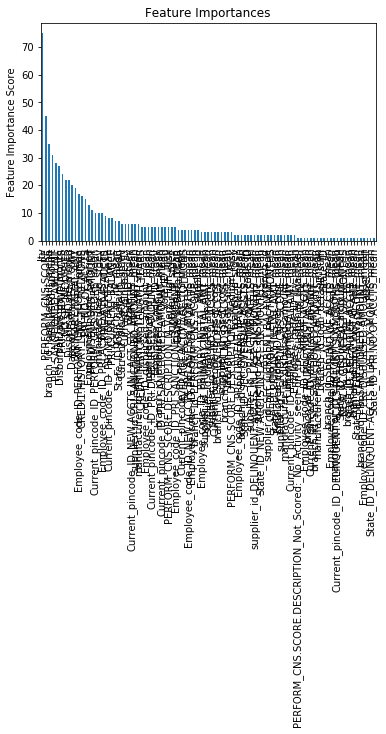

In [45]:
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
model2 = SVR(kernel = 'rbf')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state = 50)

from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators = 270, max_depth=5,
                               min_samples_split=30,min_samples_leaf=12,max_leaf_nodes=30,min_weight_fraction_leaf=0.1,random_state = 50)

from xgboost import XGBRegressor
model5 = XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
model6 = KNeighborsRegressor(n_neighbors =37)

from sklearn.linear_model import Ridge, Lasso ,ElasticNet

model7 = Ridge()

model8 = Lasso(max_iter=1000,alpha=2000)

model9 = RandomForestRegressor()

model10 = ElasticNet()

from vecstack import stacking



In [ ]:
model_fn(model4,final_train[predictor_var],final_train[outcome_var],
         final_test[predictor_var],final_test[outcome_var],predictor_var,
         3,'alg2.csv', False, True, False)

In [46]:
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

[0]	train-auc:0.631279+0.00049154	test-auc:0.624418+0.0028269
[1]	train-auc:0.63961+0.00104671	test-auc:0.630954+0.00198248
[2]	train-auc:0.643767+0.00101096	test-auc:0.63448+0.00186469
[3]	train-auc:0.646588+0.000628508	test-auc:0.63678+0.00205663
[4]	train-auc:0.648633+0.000829758	test-auc:0.638511+0.00246942
[5]	train-auc:0.650511+0.000674974	test-auc:0.640529+0.00244095
[6]	train-auc:0.65205+0.000536624	test-auc:0.641833+0.00275964
[7]	train-auc:0.653639+0.000280794	test-auc:0.643095+0.00276687
[8]	train-auc:0.655132+0.000611887	test-auc:0.644177+0.00265001
[9]	train-auc:0.656612+0.00049758	test-auc:0.645284+0.00270786
[10]	train-auc:0.657857+0.000500788	test-auc:0.646+0.00243244
[11]	train-auc:0.659018+0.000564328	test-auc:0.646848+0.00245555
[12]	train-auc:0.660501+0.000419007	test-auc:0.648085+0.00240561
[13]	train-auc:0.661655+0.000511594	test-auc:0.649021+0.00247884
[14]	train-auc:0.662973+0.000453953	test-auc:0.650154+0.00229381
[15]	train-auc:0.66416+0.000368135	test-auc:0.6

[127]	train-auc:0.725643+0.000535525	test-auc:0.673003+0.0033494
[128]	train-auc:0.725926+0.0005068	test-auc:0.673019+0.00336867
[129]	train-auc:0.726263+0.000442501	test-auc:0.673007+0.0033873
[130]	train-auc:0.726537+0.000443321	test-auc:0.673026+0.00343254
[131]	train-auc:0.726831+0.000512902	test-auc:0.673044+0.00342084
[132]	train-auc:0.727155+0.000497229	test-auc:0.673063+0.00341938
[133]	train-auc:0.727459+0.000480485	test-auc:0.673076+0.00345643
[134]	train-auc:0.727774+0.000413475	test-auc:0.67307+0.00342657
[135]	train-auc:0.728089+0.000452013	test-auc:0.673115+0.00341202
[136]	train-auc:0.728352+0.000481161	test-auc:0.673127+0.00341373
[137]	train-auc:0.7286+0.000450101	test-auc:0.673089+0.00339293
[138]	train-auc:0.728925+0.000473015	test-auc:0.673071+0.00336445
[139]	train-auc:0.729204+0.000448709	test-auc:0.673112+0.00337346
[140]	train-auc:0.729482+0.000453846	test-auc:0.673099+0.00344368
[141]	train-auc:0.72979+0.000463262	test-auc:0.673095+0.0034162
[142]	train-auc:0.7

[253]	train-auc:0.75777+0.000772619	test-auc:0.673553+0.00336012
[254]	train-auc:0.757985+0.000756381	test-auc:0.673511+0.00335921
[255]	train-auc:0.75824+0.000730838	test-auc:0.673525+0.00332148
[256]	train-auc:0.758486+0.000747653	test-auc:0.673526+0.00328704
[257]	train-auc:0.75866+0.000726603	test-auc:0.67351+0.00328768
[258]	train-auc:0.758889+0.000766416	test-auc:0.673524+0.00329167
[259]	train-auc:0.759121+0.000784679	test-auc:0.673497+0.00328134
[260]	train-auc:0.759366+0.000803285	test-auc:0.673498+0.00331737
[261]	train-auc:0.759613+0.000790596	test-auc:0.673443+0.00331252
[262]	train-auc:0.759854+0.000772019	test-auc:0.673422+0.00331423
[263]	train-auc:0.760082+0.000785613	test-auc:0.673476+0.00331268
[264]	train-auc:0.760301+0.000792777	test-auc:0.673505+0.00328137
[265]	train-auc:0.760526+0.00076079	test-auc:0.673443+0.00329422
[266]	train-auc:0.760728+0.000753404	test-auc:0.67344+0.00330102
[267]	train-auc:0.760959+0.000729075	test-auc:0.67344+0.00331802
[268]	train-auc:0

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7845
AUC Score (Train): 0.677410


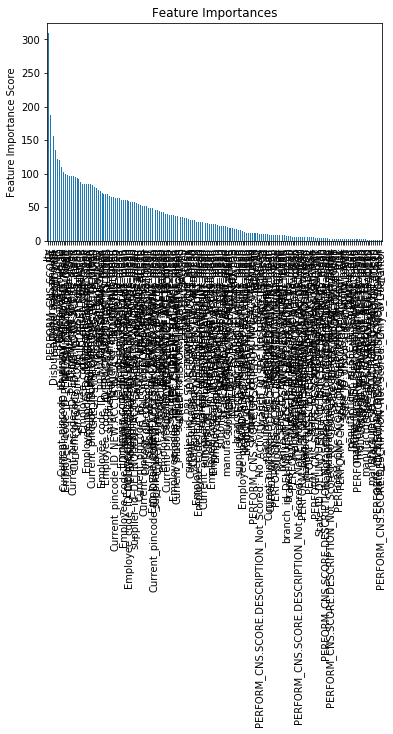

In [47]:
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=10, early_stopping_rounds=50)

In [ ]:
top_20_features = pd.Series(model1.get_booster().get_fscore()).sort_values(ascending=False)[:30]

In [ ]:
top_20_ft = list(top_20_features.index)

In [ ]:
top_20_ft

In [ ]:
from sklearn.metrics import roc_curve, auc
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Performance(model1,y_validation,X_validation)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
np.linspace(0,1,11)

In [ ]:
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()

param_space = {
    'learning_rate': hp.choice('learning_rate', np.linspace(0,1,11)),
    'min_child_weight': hp.choice('min_child_weight', range(1,7)),
    'gamma': hp.choice('gamma', np.linspace(0,1,11)),
    'subsample': hp.choice('subsample', np.linspace(0,1,11)),
    'colsample_bytree': hp.choice('colsample_bytree', np.linspace(0,1,11)),
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,55)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=5, trials=trials)
print ('best:')
print (best)


In [ ]:
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=110,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)